## Solution de référence
***
<br>

# ITSMO > Analyse des signaux

## Moments et distributions

Une distribution indique les probabilités ou fréquences d'apparition d'intervalles de valeurs parmi un ensemble. Elle caractérise et résume un ensemble de données ou le phénomène qui les génère, ce qui est particulièrement important dans le cas de phénomènes (et donc de signaux) aléatoires. Diverses lois de probabilité théoriques, telle que la loi normale ou gaussienne, permettent de modéliser des comportements aléatoires particuliers. 

Nous utiliserons ici des représentations sous forme de densité de probabilité, bien qu'il soit également possible de représenter une distribution de probabilités par sa fonction de répartition.

Les moments des distributions sont des valeurs scalaires qui caractérisent et résument la position et la forme d'une distribution.

### Signal réel mesuré
Soit un signal de mesure de température $Tx$ (salle de travaux pratiques ENSCBP) échantillonné à la fréquence $\nu e = 1 Hz$ et enregistré dans un fichier de données.
> Exécutez le code ci-dessous.

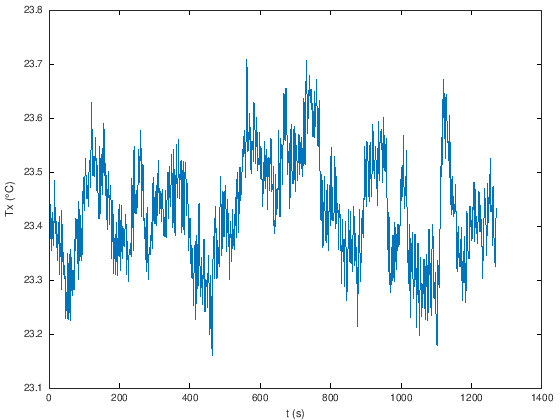

In [1]:
% Chargement du signal mesuré (enregistré à la fréquence de 1 Hz dans le fichier "Tx.mat")
load('data/Tx.mat');
N = length(Tx);

% Tracé
plot(t,Tx)
xlabel('t (s)');
ylabel('Tx (\degC)')

### Calcul des moments : moyenne et écart-type (et variance)
Les moments d'ordre 1 et 2 des distributions sont très couramment utilisés car ils sont faciles à calculer, à manipuler, et à interpréter physiquement.

Moyenne de $X$ = moment d'ordre 1 de $X$ : $\mu(X) = E(X)$ $\rightarrow$ même unité que $X$.
<br>Variance de $X$ = moment centré d'ordre 2 de $X$ : $\sigma^2(X) = E([X-E(X)]^2)$ $\rightarrow$ carré de l'unité de $X$.
<br>Écart-type de $X$ = racine carrée de la variance de $X$ : $\sigma(X) = \sqrt{E([X-E(X)]^2)}$ $\rightarrow$ même unité que $X$.
> Complétez le code ci-dessous de façon à calculer la moyenne, la variance, et l'écart-type de $Tx$, en utilisant les fonctions `mean`, `var`, et `std`.

In [2]:
% Calculs des statistiques
m = mean(Tx)
v = var(Tx)
s = std(Tx)

m =  23.430
v =  0.0094353
s =  0.097136


> Complétez le code ci-dessous de façon à superposer au graphe précédent la moyenne, la moyenne moins deux écarts-types, et la moyenne plus deux écarts-types, sous forme de droites horizontales.

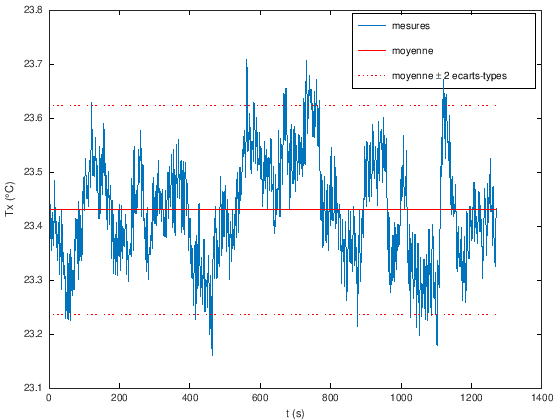

In [3]:
% Tracé
plot(t,Tx)
xlabel('t (s)');
ylabel('Tx (\degC)')
hold on
plot([0, max(t)],[m, m],'r');
plot([0, max(t)],[m+2*s, m+2*s],'r:');
plot([0, max(t)],[m-2*s, m-2*s],'r:');
hold off
legend('mesures', 'moyenne', 'moyenne \pm 2 ecarts-types')

### Répartition autour de la moyenne
Pour des données aléatoires issues de mesures, l'hypothèse d'une distribution normale est souvent formulée en raison du théorème central limite. Les pourcentages de nombres de valeurs, appartenant à des intervalles définis par la moyenne et l'écart-type, sont bien connus pour cette distribution :
- environ 68 % des valeurs sont comprises dans un intervalle de largeur 2 écarts-types autour de la moyenne,
- environ 95 % des valeurs sont comprises dans un intervalle de largeur 4 écarts-types autour de la moyenne.

> Écrivez puis exécutez le code permettant de calculer les pourcentages de valeurs contenues dans ces intervalles, pour le signal $Tx$. Utilisez pour cela les fonctions `find` et `length`.

In [4]:
% Calcul des pourcentages
p2s = 100*length(find(Tx<m+s & Tx>m-s))/N
p4s = 100*length(find(Tx<m+2*s & Tx>m-2*s))/N

p2s =  66.798
p4s =  95.279


### Histogramme simple
Un histogramme indique le nombre de valeurs appartenant à des intervalles régulièrement répartis entre le minimum et le maximum des données. Son intégrale n'étant pas égale à 1, il ne peut pas être directement assimilé à une densité de probabilité.
> Exécutez le code ci-dessous.
> <br>Vous pouvez aussi modifier le nombre de classes de l'histogramme (fonction `hist`), et exécuter à nouveau le code pour observer l'effet de ce paramètre.

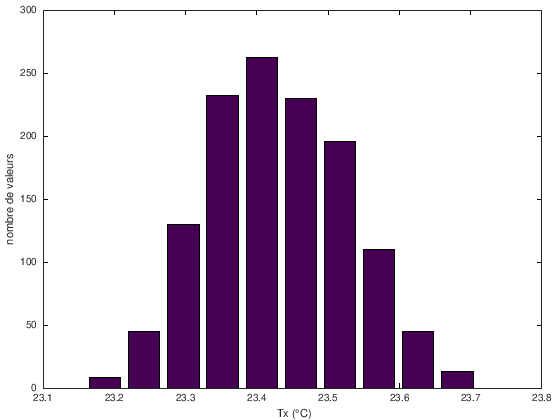

In [5]:
% Calcul de l'histogramme
[p,x] = hist(Tx);

% Tracé
bar(x,p);
xlabel(' Tx (\degC)');
ylabel('nombre de valeurs')

### Estimation de la densité de probabilité : histogramme normalisé
La normalisation de l'histrogramme consiste à obtenir une intégrale égale à 1, compatible avec les propriétés d'une densité de probabilité. Il suffit pour cela de calculer l'intégrale de l'histogramme simple, puis de diviser l'amplitude de celui-ci par la valeur de son intégrale.
> Écrivez puis exécutez le code permettant de réaliser cette normalisation de l'histogramme précédent. Utilisez pour cela la fonction `trapz`.
> <br>Vous pouvez aussi vérifier que l'intégrale de l'histogramme normalisé vaut bien 1, à nouveau avec la fonction `trapz`.

in =  1.00000


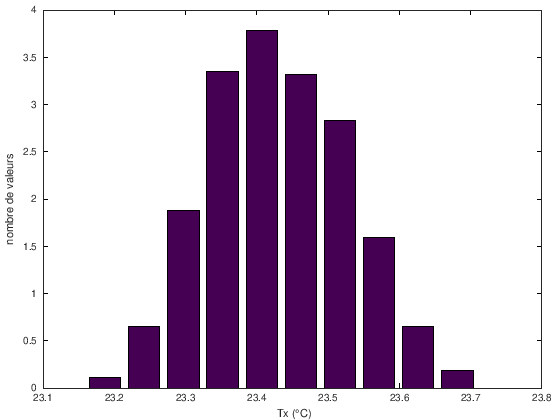

In [6]:
% Normalisation de l'histogramme
d = trapz(x,p);
p = p/d;

% Tracé
bar(x,p);
xlabel(' Tx (\degC)');
ylabel('nombre de valeurs')

% Vérification
in = trapz(x,p)

### Comparaison graphique avec une distribution normale
La densité de probabilité d'une distribution normale est donnée par : $f(x,\mu,\sigma) = \frac{1}{\sigma \sqrt{2\pi}} \cdot e^{-\frac{(x-\mu)^2}{2\sigma^2}}$
<br>Avec $x$ : valeur pour laquelle est calculée la densité de probabilité, $\mu$ : moyenne, $\sigma$ : écart-type.
> Écrivez puis exécutez le code permettant de superposer sur un même graphe : l'estimation de la densité de probabilité des mesures $Tx$ (histogramme normalisé précédent), et celle d'une distribution normale de même moyenne et écart-type. Utilisez pour cela la fonction `normpdf`, avec un vecteur $x$ dont les valeurs sont comprises entre le minimum et le maximum des données, la moyenne $\mu$ estimée, et l'écart-type $\sigma$ estimé.
<br>Pour obtenir une courbe "lisse", créez un vecteur d'abscisses $x$ avec la fonction `linspace`.

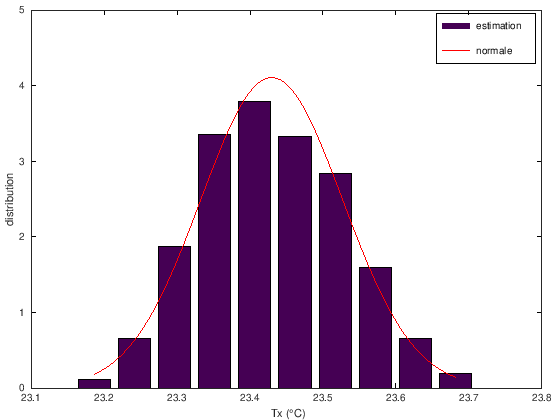

In [7]:
% Distribution normale
xn = linspace(min(x), max(x));
pn = normpdf(xn,m,s);

% Tracé
bar(x,p);
xlabel(' Tx (\degC)');
ylabel('distribution')
hold on
plot(xn,pn,'r')
hold off
legend('estimation', 'normale')